In [ ]:
import plotly.graph_objs as go  
import plotly.io as pio 
import plotly.express as px 
import pandas as pd 
import numpy as np
import seaborn as sns

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt

In [ ]:
# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [ ]:
# Initializing Plotly
pio.renderers.default = 'colab'

In [ ]:
# Importing Dataset1
# Load dataset from Our World in Data
filename="owid-covid-data.csv"
df = pd.read_csv(filename)

# Display first few rows
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  01-03-2020          1.0        1.0   
1      AFG      Asia  Afghanistan  02-03-2020          1.0        0.0   
2      AFG      Asia  Afghanistan  03-03-2020          1.0        0.0   
3      AFG      Asia  Afghanistan  04-03-2020          1.0        0.0   
4      AFG      Asia  Afghanistan  05-03-2020          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0               0.143           0.0         0.0                  0.0  ...   
1               0.143           0.0         0.0                  0.0  ...   
2               0.143           0.0         0.0                  0.0  ...   
3               0.143           0.0         0.0                  0.0  ...   
4               0.143           0.0         0.0                  0.0  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511    41128772   
1            64.83                    0.511    41128772   
2            64.83                    0.511    41128772   
3            64.83                    0.511    41128772   
4            64.83                    0.511    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [ ]:
#cleaning and Handling Missing Values
# Select relevant columns
df = df[['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths',
         'new_deaths', 'total_vaccinations', 'people_fully_vaccinated']]

# Drop rows without continent
df.dropna(subset=['continent'], inplace=True)

# Fill missing numeric values with 0
df.fillna(0, inplace=True)

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [ ]:
#Feature Selection and Engineering

# Mortality rate (%)
df['mortality_rate'] = np.where(df['total_cases'] > 0,
                                df['total_deaths'] / df['total_cases'] * 100, 0)

# Vaccination rate
df['vaccination_rate'] = np.where(df['total_vaccinations'] > 0,
                                  df['people_fully_vaccinated'] / df['total_vaccinations'] * 100, 0)


In [ ]:
#Ensuring Data Integrity & Consistency

# Remove negative values
df = df[(df['new_cases'] >= 0) & (df['new_deaths'] >= 0)]

# Drop duplicates
df = df.drop_duplicates()

# Check for nulls
assert df.isnull().sum().sum() == 0, "There are still missing values!"


In [ ]:
#Summary Statistics and Insights

print(df.describe())

                                date   total_cases     new_cases  \
count                         373823  3.738230e+05  3.738230e+05   
mean   2022-06-01 16:21:06.952541696  1.914535e+06  2.075675e+03   
min              2020-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-05-03 00:00:00  7.762000e+03  0.000000e+00   
50%              2022-06-08 00:00:00  6.375900e+04  0.000000e+00   
75%              2023-07-03 00:00:00  6.413070e+05  0.000000e+00   
max              2024-08-14 00:00:00  1.034368e+08  4.047548e+07   
std                              NaN  8.032613e+06  8.770330e+04   

       total_deaths     new_deaths  total_vaccinations  \
count  3.738230e+05  373823.000000        3.738230e+05   
mean   2.142715e+04      18.888570        1.747899e+07   
min    0.000000e+00       0.000000        0.000000e+00   
25%    6.400000e+01       0.000000        0.000000e+00   
50%    7.990000e+02       0.000000        0.000000e+00   
75%    8.063000e+03       0.000000     

In [ ]:
# Top countries by total cases
top_cases = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(5)
print("Top 5 countries with highest total cases:\n", top_cases)


Top 5 countries with highest total cases:
 location
United States    103436829.0
China             99373219.0
India             45041748.0
France            38997490.0
Germany           38437756.0
Name: total_cases, dtype: float64


In [ ]:
#Identifying Patterns, Trends, and Anomalies

# Global aggregation
global_df = df.groupby('date').sum(numeric_only=True).reset_index()

# Global new cases trend
fig = px.line(global_df, x='date', y='new_cases', title='Global Daily New COVID-19 Cases')
fig.show()


In [ ]:
# Global new deaths trend
fig = px.line(global_df, x='date', y='new_deaths', title='Global Daily New COVID-19 Deaths')
fig.show()

In [ ]:
#Handling Outliers & Data Transformations

# Log transform to manage skewness
df['log_new_cases'] = np.log1p(df['new_cases'])

# Box plot to visualize outliers
fig = px.box(df, y='log_new_cases', title='Log-Transformed New Cases (Outlier Detection)')
fig.show()

In [ ]:
#Initial Visual Representations

#Top 10 Countries By total Death

top_deaths = df.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_deaths, x='location', y='total_deaths',
             title='Top 10 Countries by Total COVID-19 Deaths',
             color='total_deaths', color_continuous_scale='reds')
fig.show()


In [ ]:
#Vaccination distribution (top 5)
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]

top_vaccinated = latest_df.sort_values(by='people_fully_vaccinated', ascending=False).head(5)

fig = px.pie(top_vaccinated, names='location', values='people_fully_vaccinated',
             title='People Fully Vaccinated (Top 5 Countries)')
fig.show()

Positive Linear Relationship

(0.0, 42499250.85)

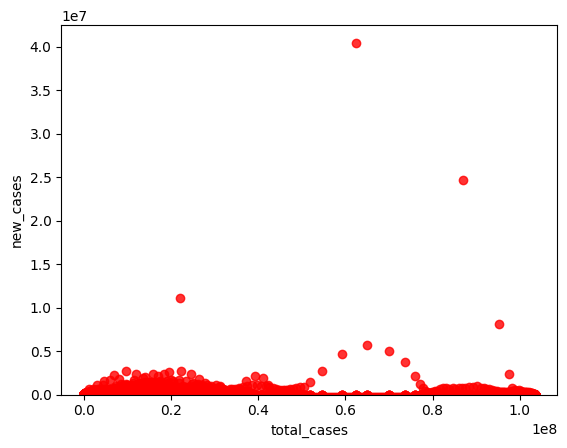

In [ ]:
#scatterplot of "total_cases" and "new_cases"
sns.regplot(x="total_cases", y="new_cases",data=df, color='red')
plt.ylim(0,)

<Axes: xlabel='total_deaths', ylabel='new_deaths'>

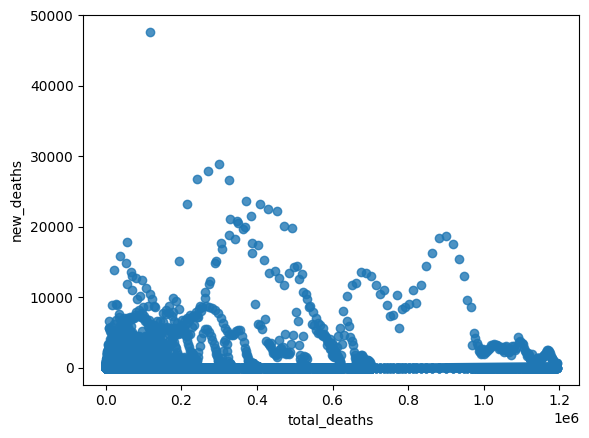

In [ ]:
sns.regplot(x='total_deaths', y='new_deaths', data=df)

Scatter plot total_cases vs total_deaths

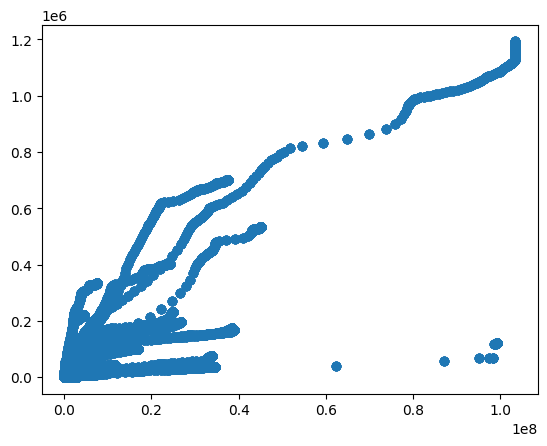

In [ ]:
plt.scatter(df['total_cases'], df['total_deaths'])

Histogram of total_deaths

(array([3.55571e+05, 1.23040e+04, 1.40800e+03, 1.16300e+03, 1.19800e+03,
        1.15600e+03, 9.10000e+01, 4.90000e+01, 2.80000e+02, 6.03000e+02]),
 array([      0. ,  119316.5,  238633. ,  357949.5,  477266. ,  596582.5,
         715899. ,  835215.5,  954532. , 1073848.5, 1193165. ]),
 <BarContainer object of 10 artists>)

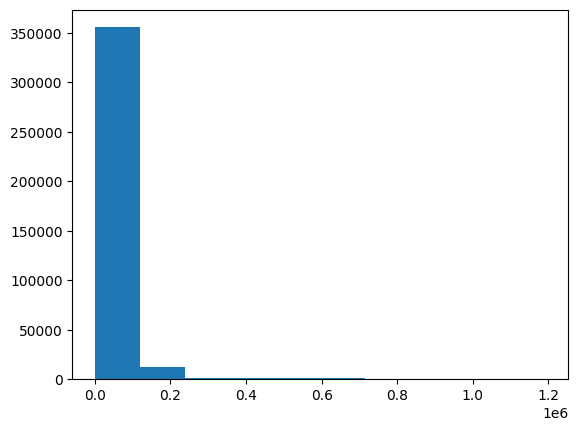

In [ ]:
plt.hist(df['total_deaths'])

(array([3.73816e+05, 4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([       0. ,  4047547.7,  8095095.4, 12142643.1, 16190190.8,
        20237738.5, 24285286.2, 28332833.9, 32380381.6, 36427929.3,
        40475477. ]),
 <BarContainer object of 10 artists>)

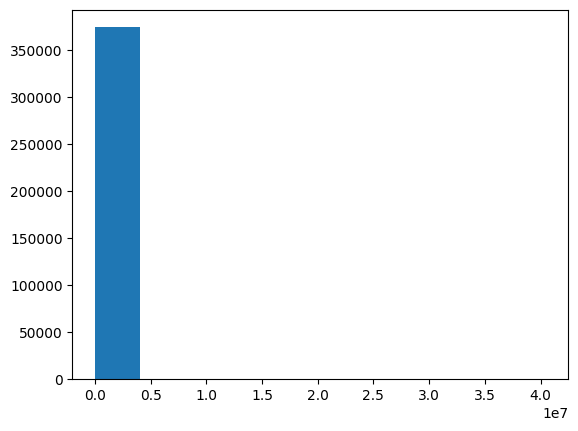

In [ ]:
plt.hist(df['new_cases'])

Barchart

In [ ]:
bardata= pd.DataFrame({'cont': ['Africa' , 'Asia', 'Oceania', 'Europe', 'North America', 'South America'], 'Num':[95058,79476,31035,92953,67351,24120]})
bardata['cont']

0           Africa
1             Asia
2          Oceania
3           Europe
4    North America
5    South America
Name: cont, dtype: object

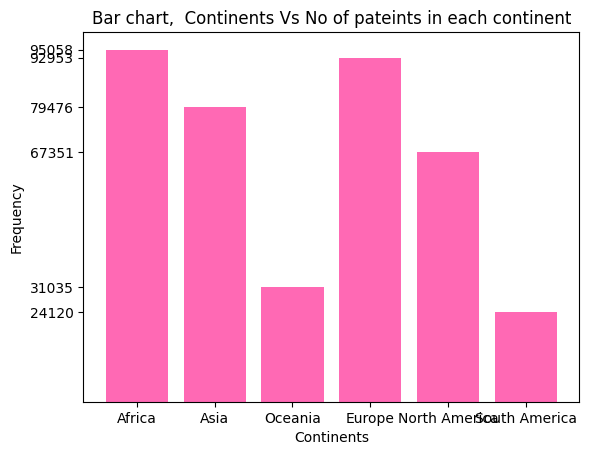

In [ ]:
plt.bar(bardata['cont'],bardata['Num'],color='hotpink')
plt.title("Bar chart,  Continents Vs No of pateints in each continent")
plt.xlabel("Continents")
plt.xticks(list(bardata['cont']))
plt.ylabel("Frequency")
plt.yticks(bardata['Num'])
plt.show()

([<matplotlib.patches.Wedge at 0x201314fbe00>,
 [Text(0.7929560773728658, 0.762378291504577, ''),
  Text(-0.6219279663522641, 0.9073067864118163, ''),
  Text(-1.0965109215720745, 0.08754312579043616, ''),
  Text(-0.6671744181421502, -0.8745732077857654, ''),
  Text(0.6566081365679161, -0.8825337132329899, ''),
  Text(1.0793016761820404, -0.21238618549858168, '')])

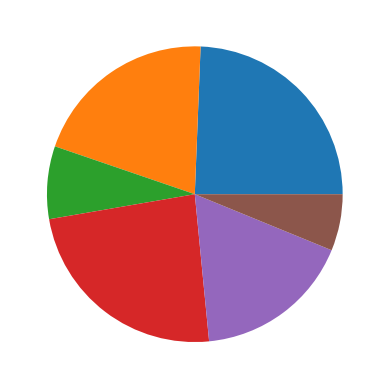

In [ ]:
plt.pie(bardata['Num'])

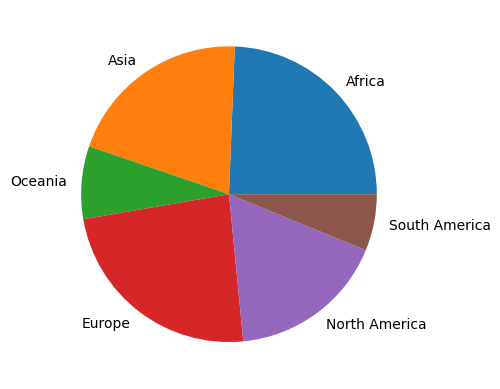

In [ ]:
plt.pie(bardata['Num'], labels = bardata['cont'])
plt.show()